# Multiple Linear Regression

In [175]:
#import
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [7]:
#read data
df= pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [8]:
#Let's select some features that we want to use for regression.
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


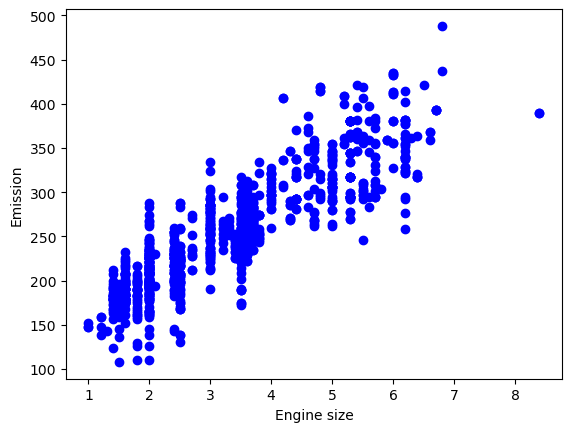

In [9]:
#Let's plot Emission values with respect to Engine size:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

#### Creating train and test dataset

We create a mask to select random rows using the np.random.rand() function:

In [11]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

##### Train data distribution

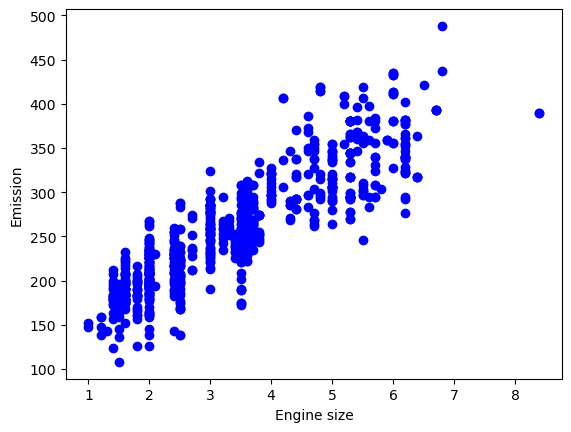

In [12]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

## Multiple Regression Model

In [15]:
regr = linear_model.LinearRegression()


In [16]:
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(train[['CO2EMISSIONS']])


In [17]:
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[11.46345555  7.9606717   9.09690271]]


## Prediction

In [18]:
y_hat= regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [19]:
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 462.82
Variance score: 0.87


In [224]:
###################################################################

In [247]:
x=[i for i in range(1,10001)]
x2=[i*2 for i in range(1,10001)]
x3 = [x[i] + x2[i] for i in range(len(x))]
y=[x3[i]*2 for i in range(len(x))]

In [248]:
te_df=pd.DataFrame()
te_df['x']=x
te_df['x2']=x2
te_df['x3']=x3
te_df['y']=y


In [249]:
te_df.head()

,x,x2,x3,y
0,1,2,3,6
1,2,4,6,12
2,3,6,9,18
3,4,8,12,24
4,5,10,15,30


In [250]:
x=te_df[['x','x2','x3']]
y=te_df['y']

In [251]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.25, random_state=42)

In [252]:
model=linear_model.LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [253]:
y_pred = model.predict(X_test)

r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r_squared)
print("MSE:", mse)

R-squared: 1.0
MSE: 1.9838581330433048e-23


In [254]:
model.intercept_ #b 

-7.275957614183426e-12

In [255]:
model.coef_ #m

array([0.42857143, 0.85714286, 1.28571429])

In [258]:
model.predict([[2,5,10]])

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([18.])

In [259]:
    
2*0.42857143   + 5*0.85714286    + 10*1.28571429    +-7.275957614183426e-12

18.000000059992722